<a href="https://colab.research.google.com/github/unnimaya-vu/CODSOFT/blob/main/movierating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

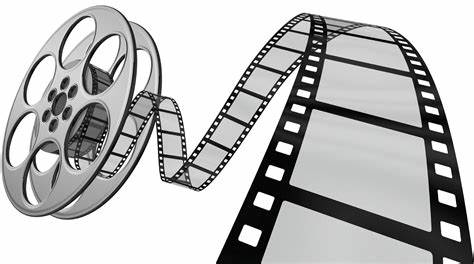Movie Rating system

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

Read the data

In [ ]:
df=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


Explore through data

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
df.isna().sum()

Name         0
Year         0
Duration     0
Genre       29
Rating       0
Votes        0
Director     0
Actor 1      0
Actor 2      0
Actor 3      0
dtype: int64

In [ ]:
df['Genre'].value_counts()

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
#converts each element of the specified columns into a row
df = df.explode('Genre')
df['Genre'].unique()


array(['Drama', 'Comedy', 'Romance', 'Musical', 'War', 'Horror',
       'Mystery', 'Thriller', 'Action', 'Crime', 'History', 'Adventure',
       'Sci-Fi', 'Sport', 'Biography', 'Family', 'Fantasy', 'Documentary',
       'Music', 'Animation', nan, 'News', 'Western'], dtype=object)

In [ ]:
#filling missing values
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [ ]:
df['Name'].unique()

array(['#Gadhvi (He thought he was Gandhi)', '#Yaaram',
       '...Aur Pyaar Ho Gaya', ..., 'Zulm Ki Zanjeer', 'Zulmi',
       'Zulm-O-Sitam'], dtype=object)

In [ ]:
#removing extra symbols and selecting the the text part from the name
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')
df['Name'].unique()

array(['Gadhvi ', 'Yaaram', 'Aur Pyaar Ho Gaya', ..., 'Zulm Ki Zanjeer',
       'Zulmi', 'Zulm-O-Sitam'], dtype=object)

In [ ]:
#removing bracket columns
df['Year'] = df['Year'].str.replace('[()]', '').astype(int)
df['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 2008, 1994, 2007, 2003, 1998, 1979,
       1974, 2015, 2006, 1981, 2020, 1985, 2013, 2011, 1988, 1987, 1999,
       1973, 1968, 1982, 1977, 1950, 1969, 1948, 1990, 1989, 2001, 2000,
       1953, 1978, 1963, 1992, 1976, 1984, 1986, 1966, 1975, 1980, 1967,
       1970, 1952, 1972, 1971, 1964, 1954, 1962, 1957, 1965, 1996, 1995,
       1956, 1955, 1936, 1983, 1951, 1961, 1959, 1949, 1960, 1946, 1940,
       1945, 1938, 1941, 1942, 1935, 1937, 1934, 1947, 1931, 1943, 1933,
       1944, 1932, 1939])

In [ ]:
df['Votes'].value_counts()

10       154
9        137
7        134
11       119
13       115
        ... 
894        1
778        1
1,570      1
4,744      1
941        1
Name: Votes, Length: 2027, dtype: int64

In [ ]:
#Replacing , in votes
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
#removing min in duration
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

In [ ]:
#drop all duplicate values by name
df=df.drop_duplicates(subset=['Name'],keep=False)

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
30,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor
...,...,...,...,...,...,...,...,...,...,...
15478,Zindagi Tere Naam,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta
15479,Zindagi Tumse,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15482,Zindagi Zindabad,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15488,Zoo,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta


In [ ]:
df.describe()

,Year,Duration,Rating,Votes
count,1528.000000,1528.000000,1528.000000,1528.000000
mean,1997.972513,123.823953,5.976243,552.479712
std,21.181921,25.108144,1.412547,4311.631841
min,1931.000000,45.000000,1.600000,5.000000
25%,1985.000000,107.000000,5.100000,14.000000
50%,2004.000000,126.000000,6.100000,34.000000
75%,2016.000000,140.000000,7.000000,127.250000
max,2021.000000,300.000000,9.400000,101014.000000


In [ ]:
df.corr()

,Year,Duration,Rating,Votes
Year,1.000000,-0.397790,-0.077641,0.073878
Duration,-0.397790,1.000000,-0.063794,0.082263
Rating,-0.077641,-0.063794,1.000000,0.107641
Votes,0.073878,0.082263,0.107641,1.000000


Data visualization

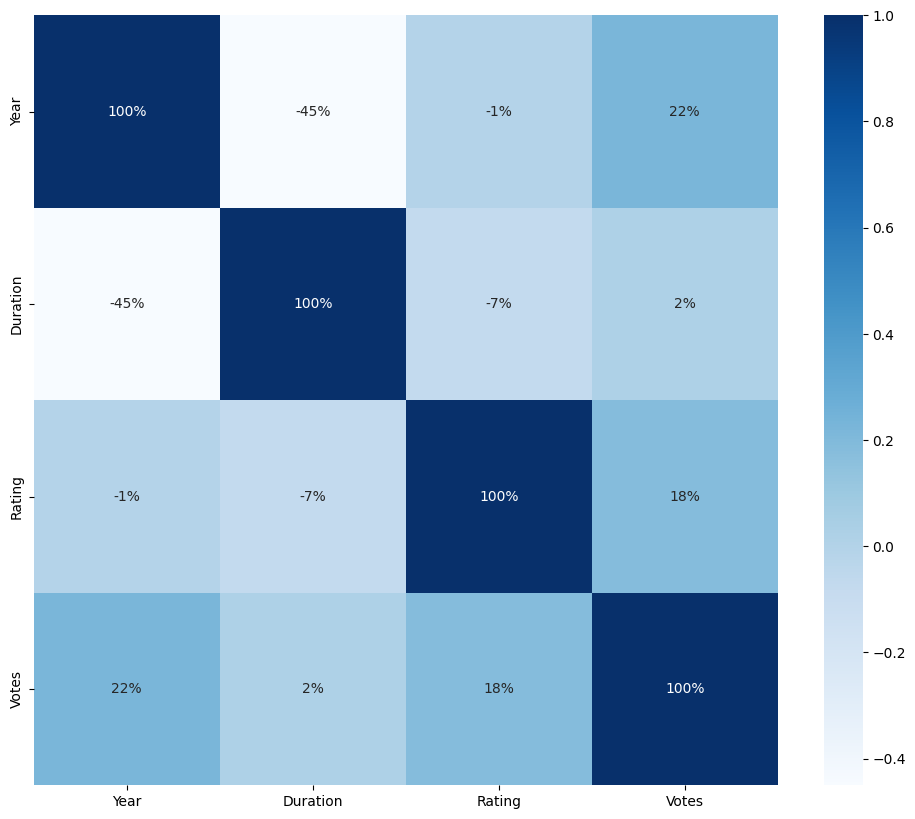

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap="Blues", fmt='.0%')
plt.show()

<Axes: xlabel='Duration', ylabel='Count'>

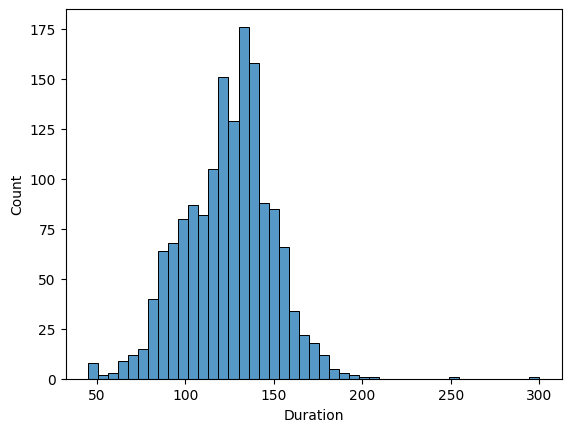

In [ ]:
sns.histplot(df['Duration'])

[Text(0, 0.0, ''),
 Text(0, 10.0, ''),
 Text(0, 20.0, ''),
 Text(0, 30.0, ''),
 Text(0, 40.0, ''),
 Text(0, 50.0, ''),
 Text(0, 60.0, ''),
 Text(0, 70.0, '')]

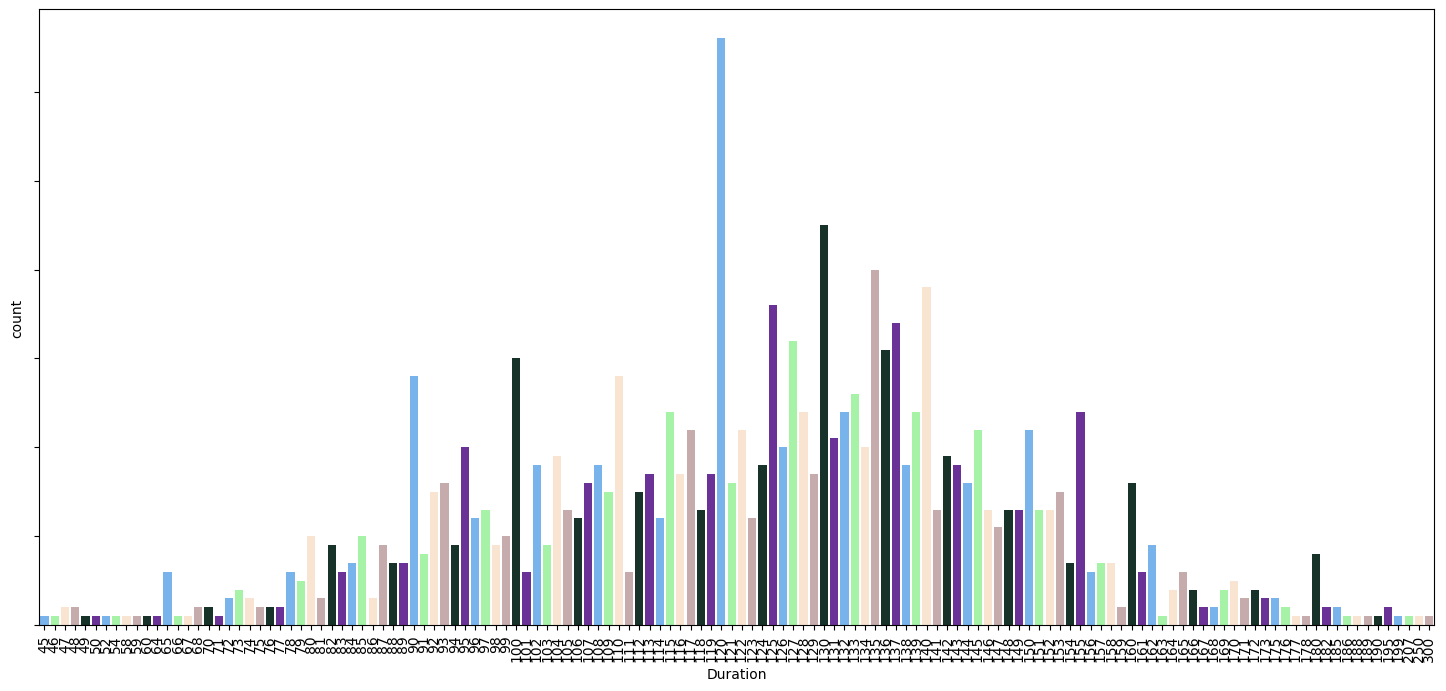

In [ ]:

colors=['#66b3ff','#99ff99','#FFE4C9','#CAA6A6','#12372A','#6C22A6']
plt.figure(figsize=(18,8))
sns.countplot(x=df['Duration'],palette=colors)
plt.xticks(rotation=90)
plt.gca().set_yticklabels([])

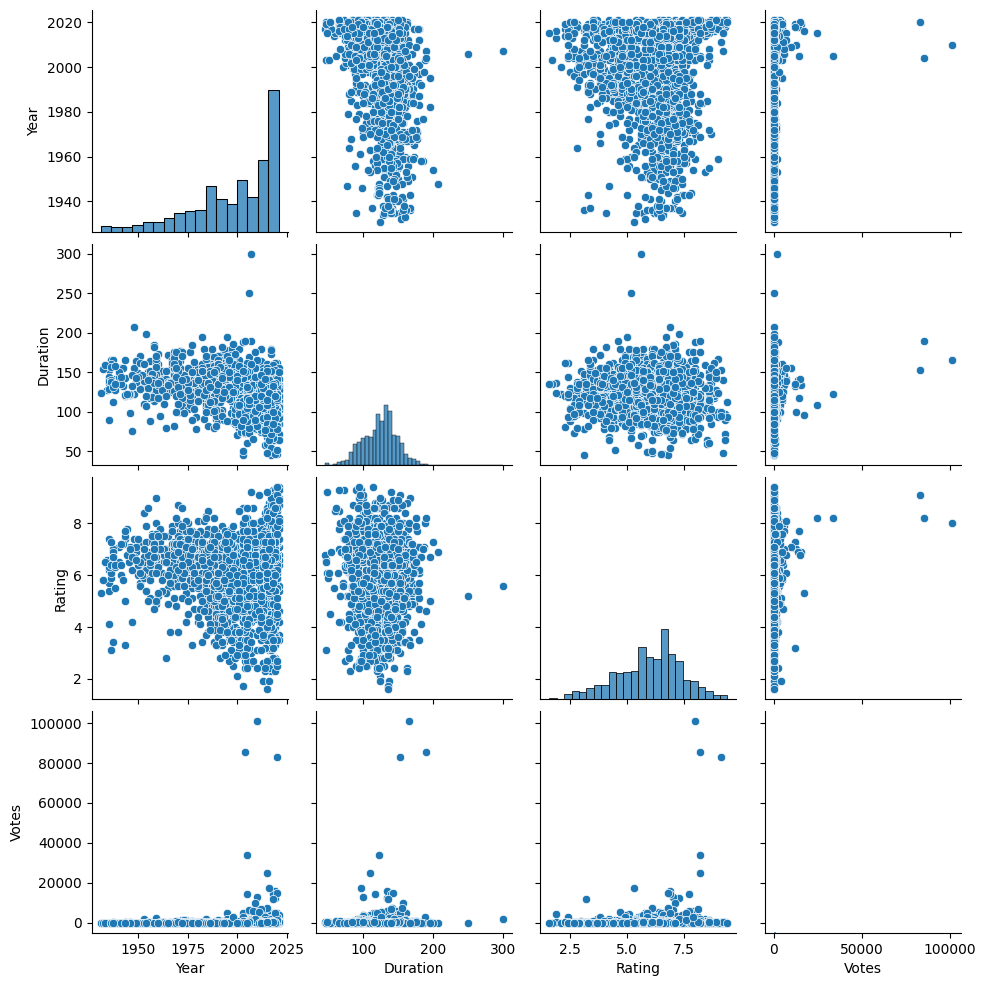

In [ ]:
sns.pairplot(df)

[Text(0, 0.0, ''),
 Text(0, 20.0, ''),
 Text(0, 40.0, ''),
 Text(0, 60.0, ''),
 Text(0, 80.0, ''),
 Text(0, 100.0, ''),
 Text(0, 120.0, '')]

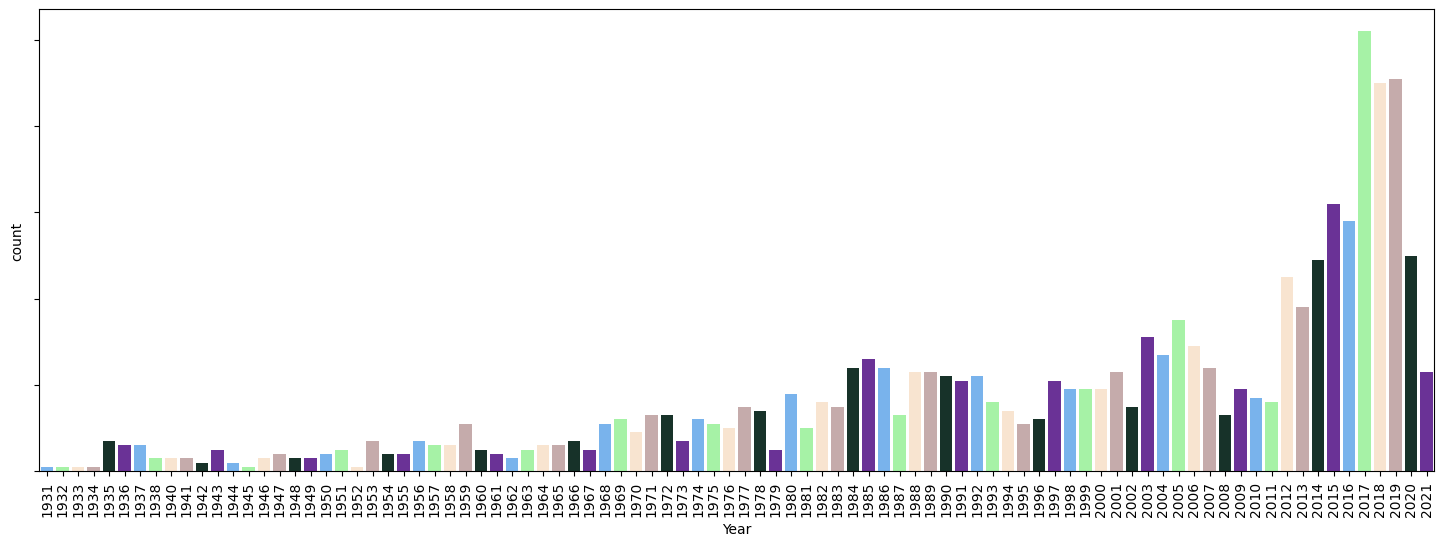

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['Year'],palette=colors)
plt.xticks(rotation=90)
plt.gca().set_yticklabels([])

Text(0.5, 1.0, 'Number of Movies Per Year')

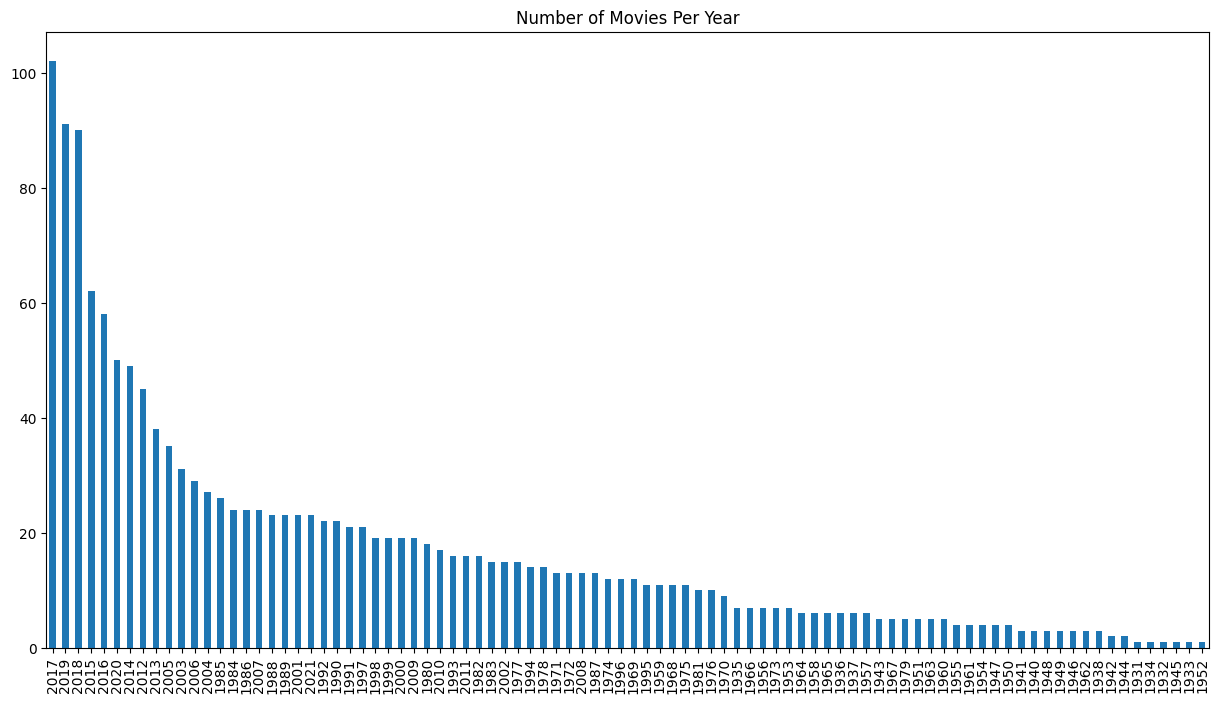

In [ ]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

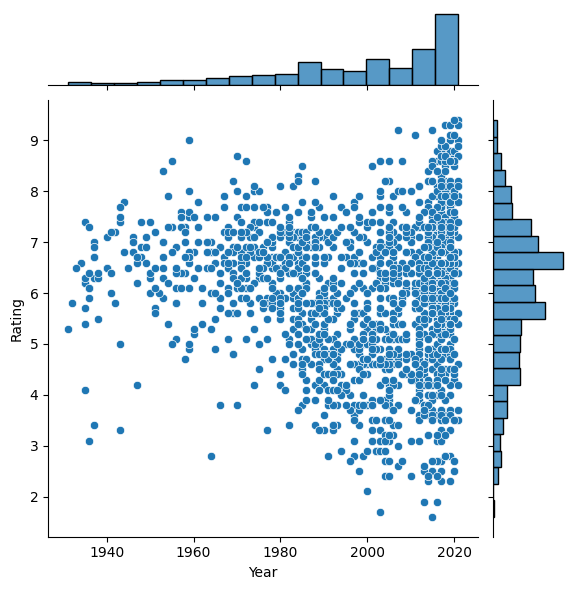

In [ ]:
sns.jointplot(x=df['Year'],y=df['Rating'])

<Axes: xlabel='Year', ylabel='Rating'>

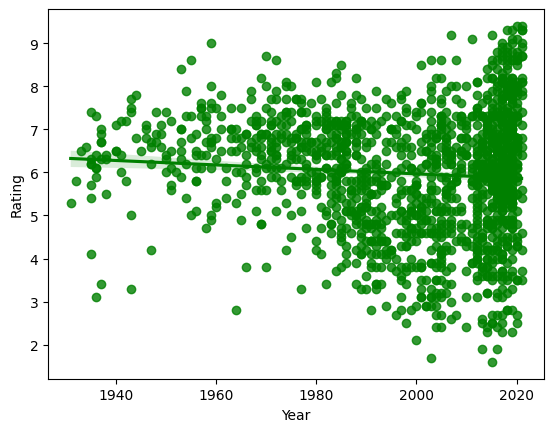

In [ ]:
sns.regplot(x=df['Year'],y=df['Rating'],color='g')


<Axes: xlabel='Duration', ylabel='Rating'>

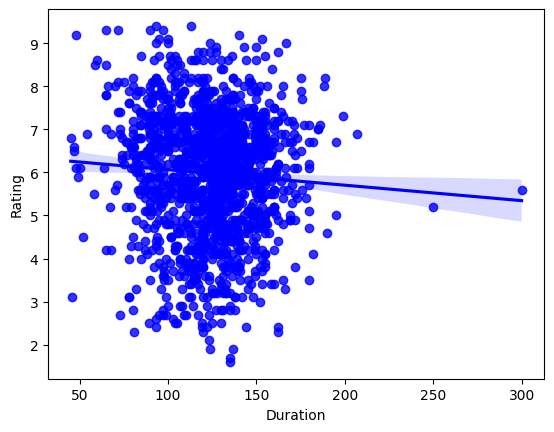

In [ ]:
sns.regplot(x=df['Duration'],y=df['Rating'],color='b')

<Axes: xlabel='Votes', ylabel='Rating'>

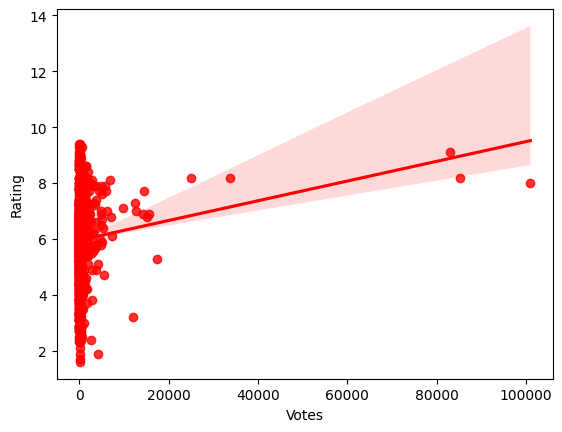

In [ ]:
sns.regplot(x=df['Votes'],y=df['Rating'],color='r')

<Axes: ylabel='Votes'>

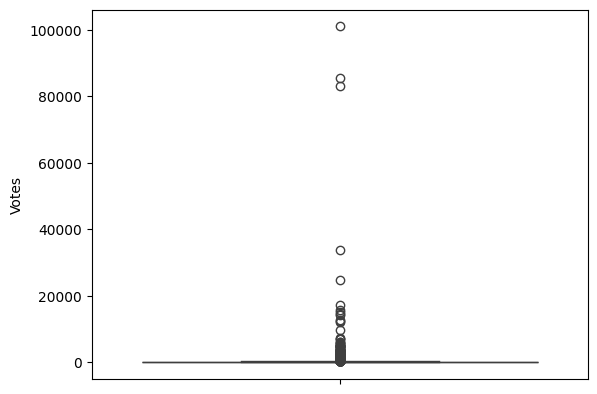

In [ ]:
sns.boxplot(y=df['Votes'])

Calculating standard deviation

In [ ]:
std=np.std(df)
std

Year          21.174988
Duration      25.099927
Rating         1.412085
Votes       4310.220736
dtype: float64

Outliers removal

In [ ]:
from scipy import stats
df=df[(np.abs(stats.zscore(df['Votes']))<3)]
std1=np.std(df)
std1
#Higher deviation means data is more spread out,lower deviation means data is more clusterd together


Year         21.202350
Duration     25.070450
Rating        1.408647
Votes       961.325650
dtype: float64

In [ ]:
# Dropping non essential columns
df.drop(['Name'], axis = 1, inplace = True)

Feature Engineering-selecting,extracting relevant features from data

This calculates the mean rating for each genre group and broadcasts the result back to the original DataFrame df. So, for each row in df, the mean rating of the corresponding genre is assigned to the genre_mean_rating column.
After executing this code, genre_mean_rating will be a pandas Series with the same length as the DataFrame df, containing the mean rating for each genre group. This can be useful for tasks such as imputing missing values or creating new features based on aggregated information.

In [ ]:
#grouping the columns with their average rating and then creating a new feature
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating
actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating
actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating
actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.405122,7.000,6.850000,7.000000,7.000
10,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,6.405122,6.200,5.766667,5.100000,6.200
11,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,4.689552,5.900,5.900000,5.900000,5.900
30,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose,6.405122,6.525,6.900000,6.866667,5.700
32,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor,6.405122,5.400,5.600000,6.400000,5.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta,5.535593,4.400,5.231818,5.450000,4.400
15479,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri,6.407143,6.000,6.000000,6.000000,6.000
15482,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji,6.405122,5.700,5.700000,5.700000,6.000
15488,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta,6.405122,5.700,5.700000,5.700000,5.700


reset the index

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.405122,7.000,6.850000,7.000000,7.000
1,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,6.405122,6.200,5.766667,5.100000,6.200
2,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,4.689552,5.900,5.900000,5.900000,5.900
3,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose,6.405122,6.525,6.900000,6.866667,5.700
4,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor,6.405122,5.400,5.600000,6.400000,5.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta,5.535593,4.400,5.231818,5.450000,4.400
1514,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri,6.407143,6.000,6.000000,6.000000,6.000
1515,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji,6.405122,5.700,5.700000,5.700000,6.000
1516,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta,6.405122,5.700,5.700000,5.700000,5.700


In [ ]:
x = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']].values
y = df['Rating'].values
x.ndim

2

Splitting training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[2.01300000e+03, 2.60000000e+01, 8.90000000e+01, ...,
        2.50000000e+00, 4.45000000e+00, 2.50000000e+00],
       [2.01900000e+03, 3.80000000e+01, 1.55000000e+02, ...,
        5.00000000e+00, 5.00000000e+00, 5.00000000e+00],
       [1.99400000e+03, 2.00000000e+01, 1.35000000e+02, ...,
        2.90000000e+00, 2.90000000e+00, 2.90000000e+00],
       ...,
       [2.01400000e+03, 3.56500000e+03, 1.00000000e+02, ...,
        7.20000000e+00, 5.80000000e+00, 6.30000000e+00],
       [2.01600000e+03, 1.18000000e+02, 1.25000000e+02, ...,
        5.06666667e+00, 5.40000000e+00, 5.50000000e+00],
       [1.95200000e+03, 7.00000000e+00, 1.46000000e+02, ...,
        6.06666667e+00, 6.90000000e+00, 6.00000000e+00]])

Model creation-Multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([7.9860892 , 7.22903223, 4.70190913, 6.72360475, 2.65724898,
       5.33395211, 5.1128693 , 6.21885154, 4.66878934, 6.08672502,
       6.78711787, 4.10660217, 5.51982059, 7.88946558, 7.21093889,
       6.64928807, 8.10637655, 6.13778554, 5.80395657, 3.17396767,
       5.23282682, 4.73043132, 5.03207222, 7.85448546, 4.57735737,
       4.58328224, 6.60820594, 6.72091461, 2.76217897, 6.31344506,
       5.43015754, 5.76773995, 2.92932533, 7.79313721, 3.45640484,
       6.42394372, 6.73545433, 5.82557644, 5.67023282, 6.62846232,
       6.99335028, 4.69896472, 3.97806954, 7.26816105, 5.85663468,
       4.81823438, 5.41767257, 6.43446678, 4.22969786, 6.31328949,
       7.1507934 , 5.15662102, 6.40399023, 6.72475081, 7.51656629,
       7.78811613, 6.28437904, 3.6136609 , 5.42614568, 4.51611399,
       5.72503013, 4.19518987, 6.07720809, 4.89013505, 6.9488759 ,
       6.62761941, 5.66070294, 6.59864934, 5.04935886, 6.57161733,
       6.56724977, 6.54756889, 4.90293252, 5.76083367, 7.30752

In [ ]:
print('slope is',model.coef_)
list(zip(x,model.coef_))

slope is [-6.67922814e-04  1.38861613e-05  1.63563024e-04  2.30674955e-02
  3.21397474e-01  1.92179351e-01  2.48444065e-01  3.47333588e-01]


[(array([2019.        ,    8.        ,  109.        ,    6.40512164,
            7.        ,    6.85      ,    7.        ,    7.        ]),
  -0.00066792281360531),
 (array([2004.        ,   17.        ,   96.        ,    6.40512164,
            6.2       ,    5.76666667,    5.1       ,    6.2       ]),
  1.3886161270580395e-05),
 (array([2016.        ,   59.        ,  120.        ,    4.68955224,
            5.9       ,    5.9       ,    5.9       ,    5.9       ]),
  0.00016356302402308707),
 (array([2005.        , 1002.        ,  116.        ,    6.40512164,
            6.525     ,    6.9       ,    6.86666667,    5.7       ]),
  0.023067495546691498),
 (array([1993.        ,   15.        ,  168.        ,    6.40512164,
            5.4       ,    5.6       ,    6.4       ,    5.825     ]),
  0.3213974742934353),
 (array([2004.        ,   16.        ,   94.        ,    6.40512164,
            4.5       ,    4.5       ,    5.1       ,    4.5       ]),
  0.19217935075712664),
 (array([

In [ ]:
print('Constant is',model.intercept_)

Constant is 0.5159897694604219


In [ ]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
0,7.8,7.986089,-0.186089
1,7.0,7.229032,-0.229032
2,4.9,4.701909,0.198091
3,6.8,6.723605,0.076395
4,3.0,2.657249,0.342751
...,...,...,...
451,5.4,5.191177,0.208823
452,6.6,6.653359,-0.053359
453,4.0,3.483339,0.516661
454,5.7,5.457966,0.242034


<Axes: >

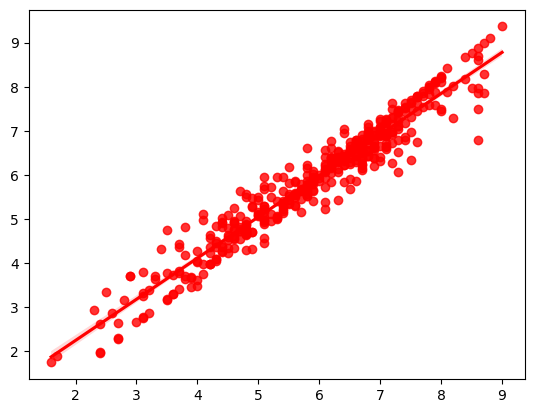

In [ ]:
sns.regplot(x=y_test,y=y_pred,color='r')

<Axes: >

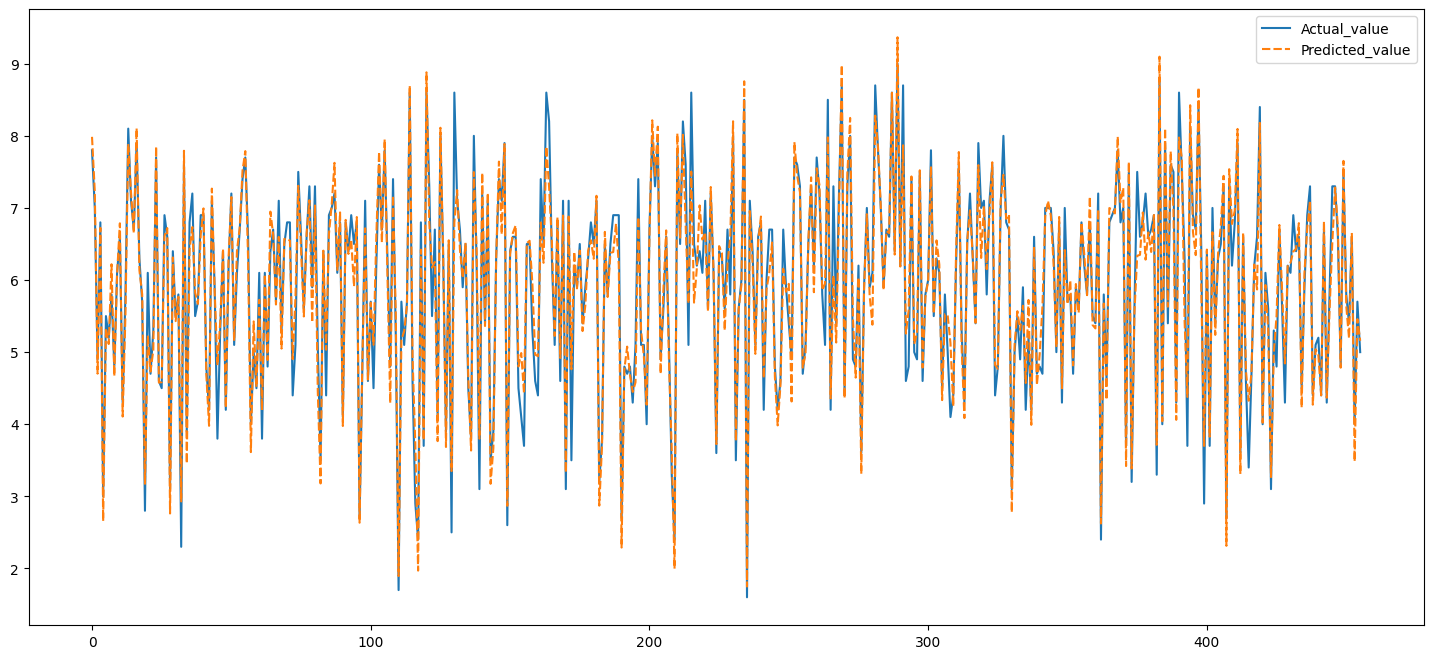

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df1[['Actual_value', 'Predicted_value']])

Performance evaluation

In [ ]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean squared Error is',mean_squared_error(y_test,y_pred))

Mean Absolute Error is 0.2569968735206353
Mean squared Error is 0.1255028236672266


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred))

Percentage error is 0.0487730374059052


In [ ]:
from sklearn.metrics import r2_score
print("R2_score is ",r2_score(y_test,y_pred))

R2_score is  0.9384116337088396


Random Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

array([7.791, 7.072, 4.814, 6.681, 2.793, 5.267, 5.184, 6.139, 4.809,
       6.099, 6.747, 4.294, 5.388, 8.038, 7.1  , 6.641, 7.902, 6.252,
       5.639, 3.013, 5.285, 4.668, 4.852, 7.695, 4.69 , 4.564, 6.889,
       6.666, 3.101, 6.405, 5.5  , 5.799, 3.615, 7.616, 3.412, 6.794,
       6.878, 5.647, 5.688, 6.914, 6.897, 4.844, 4.21 , 7.138, 5.902,
       4.662, 5.506, 6.404, 4.352, 6.459, 7.169, 5.143, 6.34 , 6.664,
       7.401, 7.695, 6.133, 3.921, 5.605, 4.695, 5.8  , 4.082, 5.89 ,
       4.79 , 7.375, 6.814, 5.698, 6.964, 4.687, 6.837, 6.696, 6.695,
       4.475, 5.74 , 7.495, 6.591, 5.594, 6.601, 7.347, 5.712, 7.356,
       4.477, 3.49 , 6.362, 4.912, 6.59 , 6.914, 7.825, 6.058, 6.935,
       4.093, 6.784, 6.321, 6.592, 6.402, 6.8  , 2.696, 4.887, 7.009,
       4.442, 5.709, 5.255, 6.866, 7.622, 6.683, 7.8  , 6.25 , 4.051,
       7.312, 5.341, 2.908, 5.076, 5.17 , 5.659, 8.555, 4.755, 2.952,
       2.388, 6.453, 3.17 , 8.615, 7.064, 6.29 , 6.214, 3.98 , 7.891,
       6.3  , 3.927,

<Axes: >

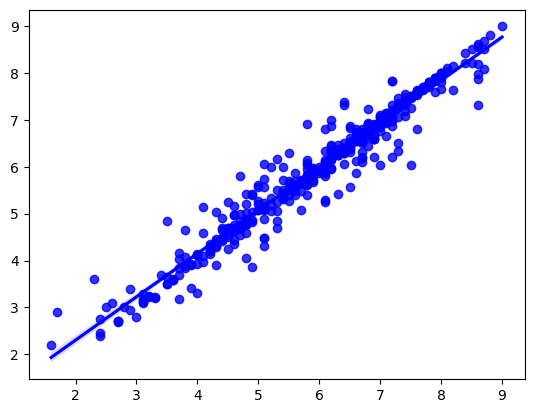

In [ ]:
sns.regplot(x=y_test,y=y_pred1,color='b')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred1))
print('Mean squared Error is',mean_squared_error(y_test,y_pred1))
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred1))
print("R2_score is ",r2_score(y_test,y_pred1))

Mean Absolute Error is 0.19016228070175428
Mean squared Error is 0.10806478070175429
Percentage error is 0.0374654512238403
R2_score is  0.9469690553363098
